In [ ]:
!pip install  tensorflow matplotlib numpy pandas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

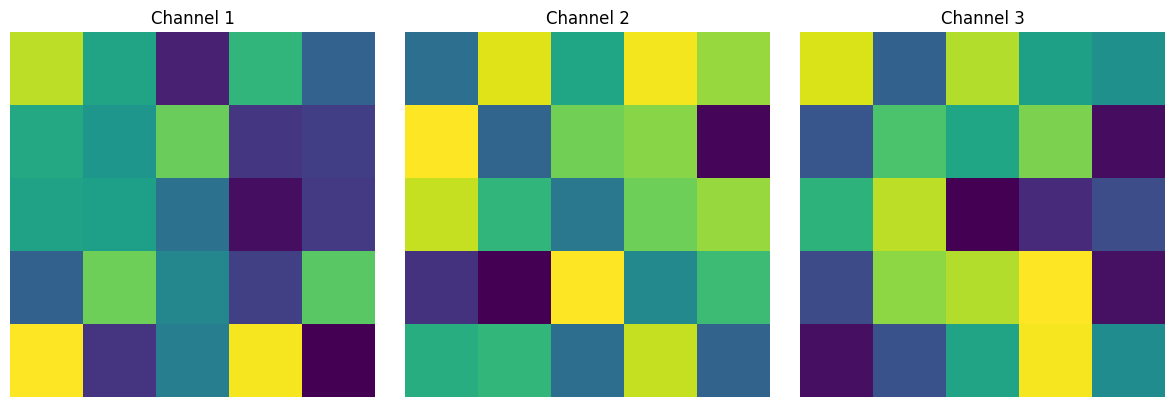

Input shape: (1, 5, 5, 3)


In [ ]:
# Input: 5x5 image with 3 channels
input_image = np.random.rand(1, 5, 5, 3)

# Visualize each channel
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    axes[i].imshow(input_image[0, :, :, i], cmap='viridis')
    axes[i].set_title(f'Channel {i+1}')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

print(f"Input shape: {input_image.shape}")

In [ ]:
# CNN Model: Convolution + MaxPooling
input_layer = layers.Input(shape=(5, 5, 3))
conv_layer = layers.Conv2D(filters=2, kernel_size=(3, 3), padding='valid', use_bias=False)(input_layer)
pool_layer = layers.MaxPooling2D(pool_size=(2, 2))(conv_layer)

model = keras.Model(inputs=input_layer, outputs=pool_layer)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 5, 5, 3)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 3, 3, 2)        │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 1, 1, 2)        │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54 (216.00 B)

 Trainable params: 54 (216.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


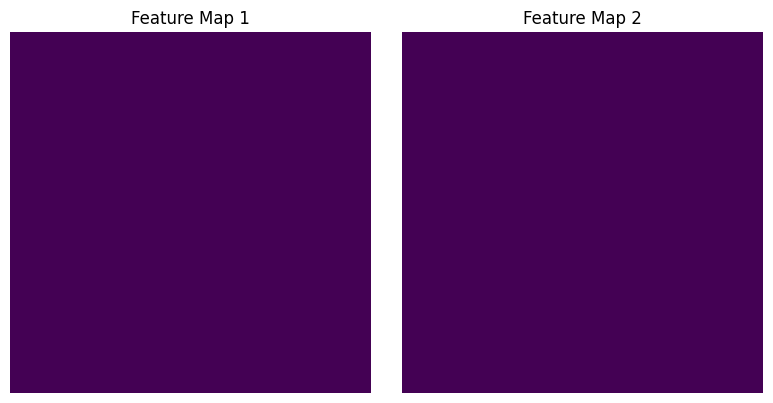

Output shape: (1, 1, 1, 2)


In [ ]:
# Feature maps after pooling
pooled_output = model.predict(input_image)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
for i in range(2):
    axes[i].imshow(pooled_output[0, :, :, i], cmap='viridis')
    axes[i].set_title(f'Feature Map {i+1}')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

print(f"Output shape: {pooled_output.shape}")

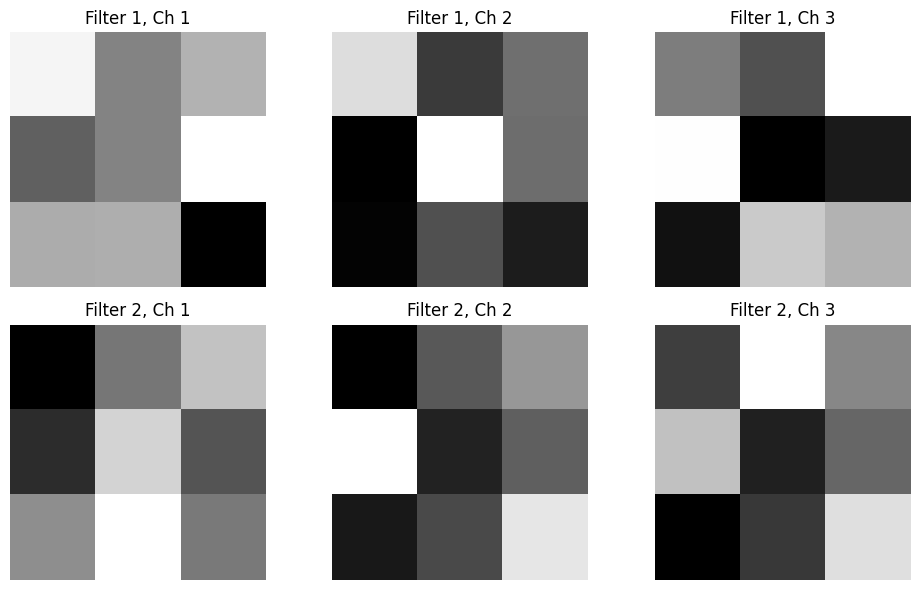

Filters shape: (3, 3, 3, 2)


In [ ]:
# Visualize filters
weights = model.layers[1].get_weights()[0]

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
for f in range(2):
    for c in range(3):
        axes[f, c].imshow(weights[:, :, c, f], cmap='gray')
        axes[f, c].set_title(f'Filter {f+1}, Ch {c+1}')
        axes[f, c].axis('off')
plt.tight_layout()
plt.show()

print(f"Filters shape: {weights.shape}")

# Part 2: CNN Benchmarking on MNIST & Fashion-MNIST

In [ ]:
import time
import pandas as pd
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load and preprocess datasets
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
(x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = fashion_mnist.load_data()

# Normalize and reshape
x_train_mnist = x_train_mnist.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test_mnist = x_test_mnist.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_train_fashion = x_train_fashion.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test_fashion = x_test_fashion.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode labels
y_train_mnist = to_categorical(y_train_mnist, 10)
y_test_mnist = to_categorical(y_test_mnist, 10)
y_train_fashion = to_categorical(y_train_fashion, 10)
y_test_fashion = to_categorical(y_test_fashion, 10)

print(f"MNIST - Train: {x_train_mnist.shape}, Test: {x_test_mnist.shape}")
print(f"Fashion-MNIST - Train: {x_train_fashion.shape}, Test: {x_test_fashion.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
MNIST - Train: (60000, 28, 28, 1), Test: (10000, 28, 28, 1)
Fashion-MNIST - Train: (60000, 28, 28, 1), Test: (10000, 28, 28, 1)


In [ ]:
# Architecture 1: Baseline (1 Conv + Dense)
def build_baseline():
    inp = layers.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, (3, 3), activation='relu')(inp)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    out = layers.Dense(10, activation='softmax')(x)
    return keras.Model(inputs=inp, outputs=out, name='Baseline')

In [ ]:
# Architecture 2: Shallow (2 Conv + MaxPooling + Dense)
def build_shallow():
    inp = layers.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, (3, 3), activation='relu')(inp)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    out = layers.Dense(10, activation='softmax')(x)
    return keras.Model(inputs=inp, outputs=out, name='Shallow')

In [ ]:
# Architecture 3: Medium (3 Conv + 2 MaxPooling + Dropout + Dense)
def build_medium():
    inp = layers.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, (3, 3), activation='relu')(inp)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    out = layers.Dense(10, activation='softmax')(x)
    return keras.Model(inputs=inp, outputs=out, name='Medium')

In [ ]:
# Architecture 4: Deep (4 Conv + BatchNorm + Dropout + Dense)
def build_deep():
    inp = layers.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, (3, 3), activation='relu')(inp)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    out = layers.Dense(10, activation='softmax')(x)
    return keras.Model(inputs=inp, outputs=out, name='Deep')

In [ ]:
# Training function
def train_model(model_fn, x_train, y_train, x_test, y_test, dataset_name):
    model = model_fn()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=5, batch_size=128,
                        validation_split=0.2, verbose=0)
    train_time = time.time() - start_time

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

    return {
        'model': model,
        'history': history,
        'test_acc': test_acc,
        'train_time': train_time,
        'params': model.count_params(),
        'dataset': dataset_name
    }

In [ ]:
# Train all models
models = [build_baseline, build_shallow, build_medium, build_deep]
results = []

print("Training on MNIST...")
for model_fn in models:
    print(f"  {model_fn().name}...")
    result = train_model(model_fn, x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist, 'MNIST')
    results.append(result)

print("\nTraining on Fashion-MNIST...")
for model_fn in models:
    print(f"  {model_fn().name}...")
    result = train_model(model_fn, x_train_fashion, y_train_fashion, x_test_fashion, y_test_fashion, 'Fashion-MNIST')
    results.append(result)

print("\nTraining complete!")

Training on MNIST...
  Baseline...
  Shallow...
  Medium...
  Deep...

Training on Fashion-MNIST...
  Baseline...
  Shallow...
  Medium...
  Deep...

Training complete!


In [ ]:
# Comparison table
comparison_data = []
for result in results:
    comparison_data.append({
        'Model': result['model'].name,
        'Dataset': result['dataset'],
        'Test Accuracy': f"{result['test_acc']:.4f}",
        'Parameters': result['params'],
        'Training Time (s)': f"{result['train_time']:.2f}"
    })

comparison_df = pd.DataFrame(comparison_data)
print("\n=== Model Comparison ===")
print(comparison_df.to_string(index=False))


=== Model Comparison ===
   Model       Dataset Test Accuracy  Parameters Training Time (s)
Baseline         MNIST        0.9812     2770634             11.15
 Shallow         MNIST        0.9882     1199882             19.45
  Medium         MNIST        0.9917      130890             13.44
    Deep         MNIST        0.9876      276746             19.06
Baseline Fashion-MNIST        0.8960     2770634             10.46
 Shallow Fashion-MNIST        0.9143     1199882             19.25
  Medium Fashion-MNIST        0.8857      130890             13.86
    Deep Fashion-MNIST        0.8963      276746             17.40


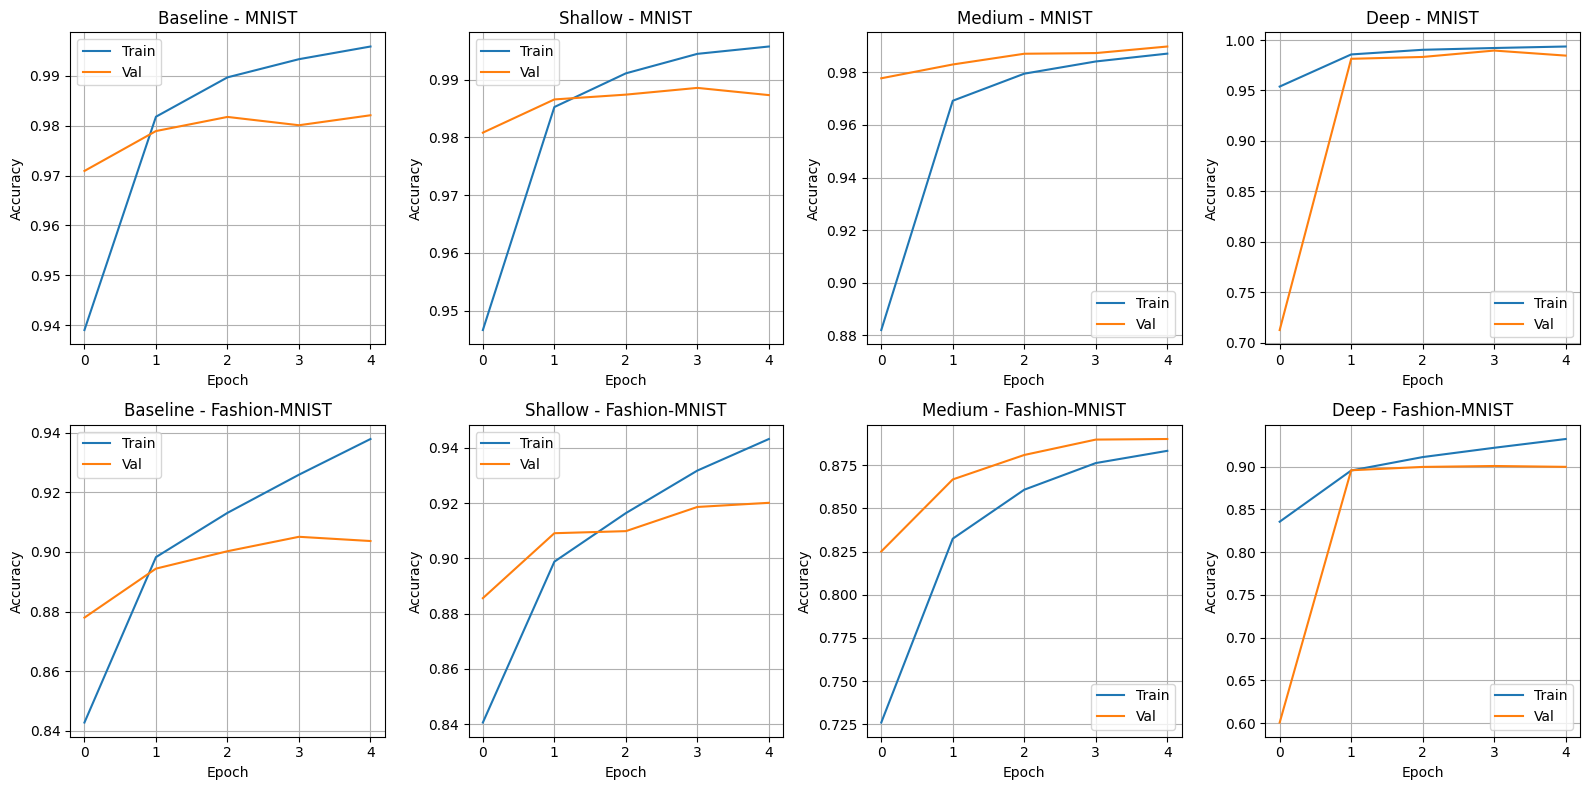

In [ ]:
# Visualize training curves
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i, result in enumerate(results):
    row = i // 4
    col = i % 4

    history = result['history']
    axes[row, col].plot(history.history['accuracy'], label='Train')
    axes[row, col].plot(history.history['val_accuracy'], label='Val')
    axes[row, col].set_title(f"{result['model'].name} - {result['dataset']}")
    axes[row, col].set_xlabel('Epoch')
    axes[row, col].set_ylabel('Accuracy')
    axes[row, col].legend()
    axes[row, col].grid(True)

plt.tight_layout()
plt.show()

Best MNIST model: Medium
Test Accuracy: 0.9917


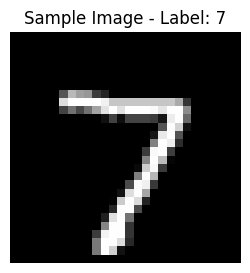

In [ ]:
# Select best MNIST model for visualization
best_mnist = max([r for r in results if r['dataset'] == 'MNIST'], key=lambda x: x['test_acc'])
best_model = best_mnist['model']

print(f"Best MNIST model: {best_model.name}")
print(f"Test Accuracy: {best_mnist['test_acc']:.4f}")

# Get a sample image
sample_idx = 0
sample_image = x_test_mnist[sample_idx:sample_idx+1]
sample_label = np.argmax(y_test_mnist[sample_idx])

plt.figure(figsize=(3, 3))
plt.imshow(sample_image[0, :, :, 0], cmap='gray')
plt.title(f'Sample Image - Label: {sample_label}')
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


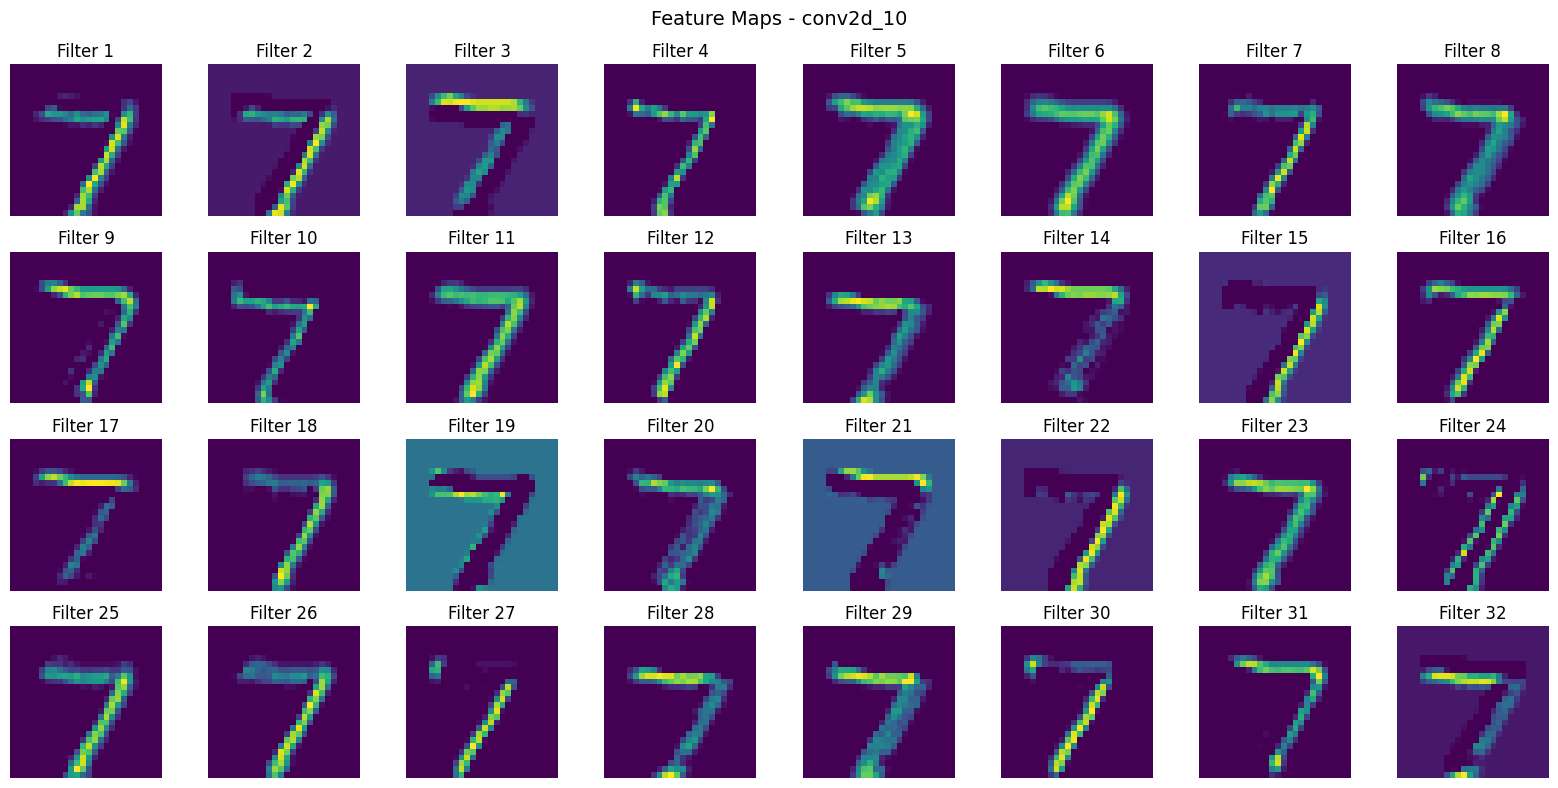

Feature maps shape: (1, 26, 26, 32)


In [ ]:
# Visualize feature maps from first Conv layer
conv_layers = [layer for layer in best_model.layers if 'conv' in layer.name]
first_conv = conv_layers[0]

# Create model to output first conv layer
feature_model = keras.Model(inputs=best_model.input, outputs=first_conv.output)
features = feature_model.predict(sample_image)

# Plot feature maps
n_features = features.shape[-1]
n_cols = 8
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 2))
axes = axes.flatten()

for i in range(n_features):
    axes[i].imshow(features[0, :, :, i], cmap='viridis')
    axes[i].set_title(f'Filter {i+1}')
    axes[i].axis('off')

for i in range(n_features, len(axes)):
    axes[i].axis('off')

plt.suptitle(f'Feature Maps - {first_conv.name}', fontsize=14)
plt.tight_layout()
plt.show()

print(f"Feature maps shape: {features.shape}")

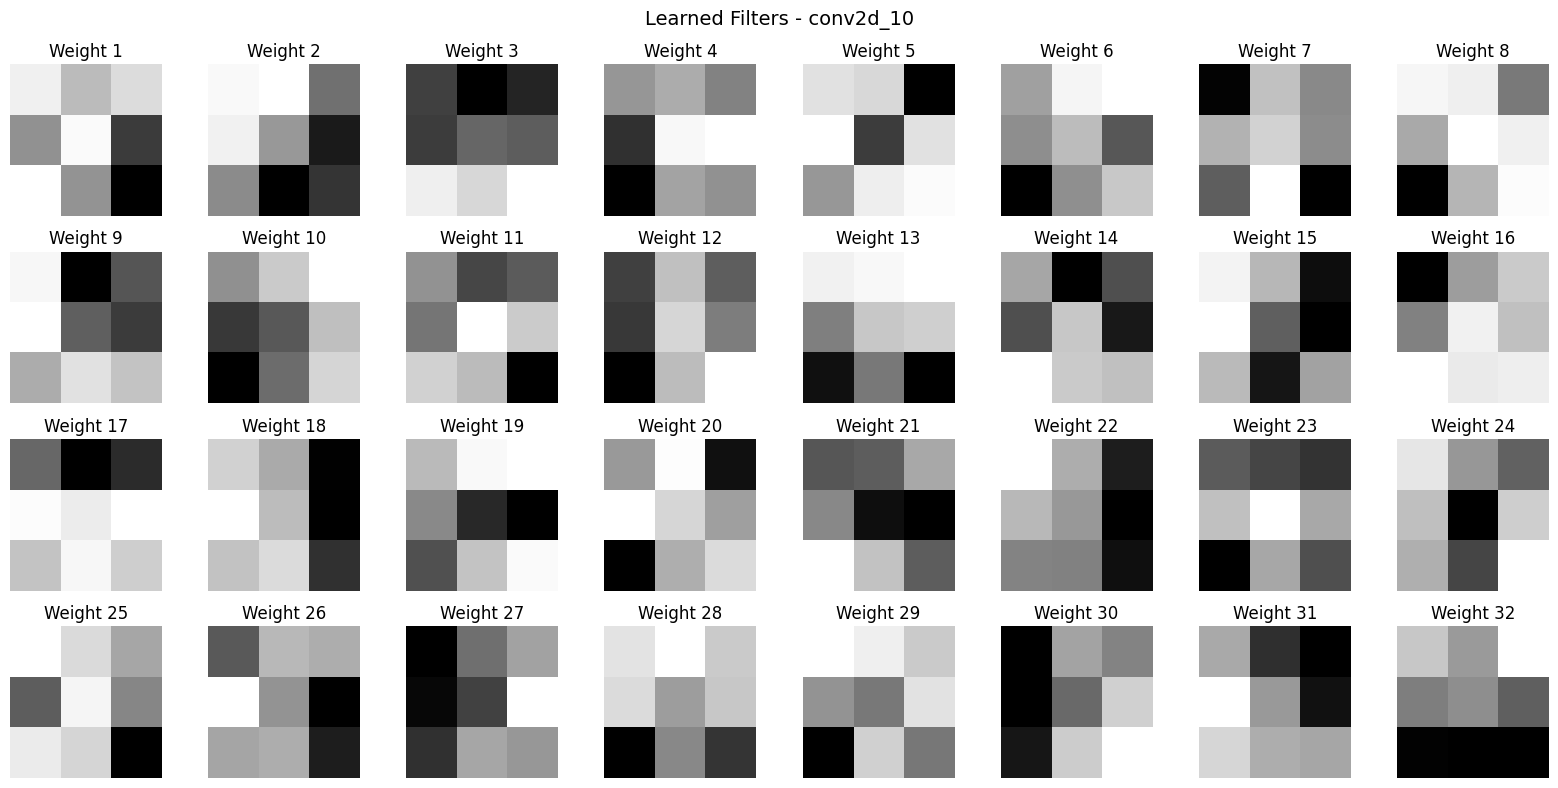

Weights shape: (3, 3, 1, 32)


In [ ]:
# Visualize learned filters (weights) from first Conv layer
weights = first_conv.get_weights()[0]  # Shape: (kernel_h, kernel_w, input_channels, filters)

n_filters = weights.shape[-1]
n_cols = 8
n_rows = (n_filters + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 2))
axes = axes.flatten()

for i in range(n_filters):
    # For grayscale input, we have 1 channel
    filter_img = weights[:, :, 0, i]
    axes[i].imshow(filter_img, cmap='gray')
    axes[i].set_title(f'Weight {i+1}')
    axes[i].axis('off')

for i in range(n_filters, len(axes)):
    axes[i].axis('off')

plt.suptitle(f'Learned Filters - {first_conv.name}', fontsize=14)
plt.tight_layout()
plt.show()

print(f"Weights shape: {weights.shape}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


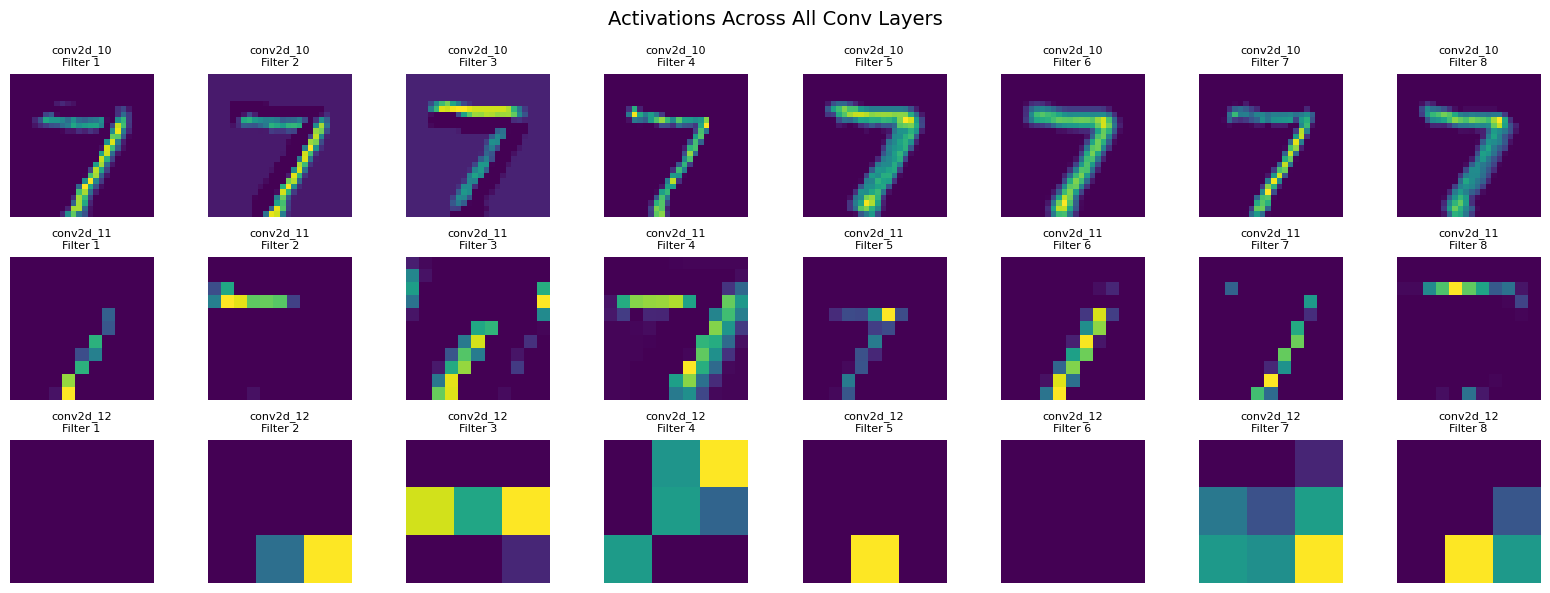

In [ ]:
# Visualize activations for all Conv layers
conv_outputs = [layer.output for layer in best_model.layers if 'conv' in layer.name]
activation_model = keras.Model(inputs=best_model.input, outputs=conv_outputs)
activations = activation_model.predict(sample_image)

fig, axes = plt.subplots(len(conv_layers), 8, figsize=(16, len(conv_layers) * 2))

for layer_idx, (layer, activation) in enumerate(zip(conv_layers, activations)):
    n_features = min(8, activation.shape[-1])

    for i in range(8):
        ax = axes[layer_idx, i] if len(conv_layers) > 1 else axes[i]

        if i < n_features:
            ax.imshow(activation[0, :, :, i], cmap='viridis')
            ax.set_title(f'{layer.name}\nFilter {i+1}', fontsize=8)
        ax.axis('off')

plt.suptitle('Activations Across All Conv Layers', fontsize=14)
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


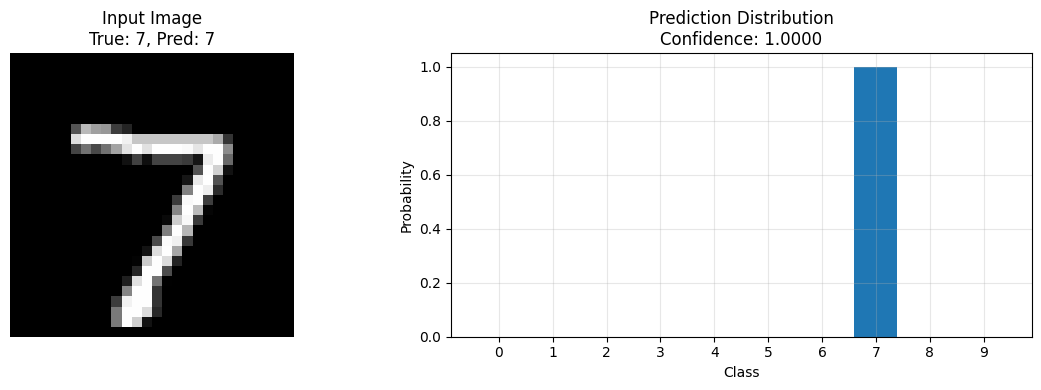

In [ ]:
# Prediction interpretation
prediction = best_model.predict(sample_image)
predicted_class = np.argmax(prediction[0])
confidence = prediction[0][predicted_class]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Original image
axes[0].imshow(sample_image[0, :, :, 0], cmap='gray')
axes[0].set_title(f'Input Image\nTrue: {sample_label}, Pred: {predicted_class}')
axes[0].axis('off')

# Prediction probabilities
axes[1].bar(range(10), prediction[0])
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Probability')
axes[1].set_title(f'Prediction Distribution\nConfidence: {confidence:.4f}')
axes[1].set_xticks(range(10))
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()